# I. Installation des librairies

Installation des packages à partir de fichier `requirements.txt`

# II. Importation des libairies des librairies

In [43]:
# Manipulation des données
import math
import numpy as np
import pandas as pd

# Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

# Modèles de régression
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Vérification des résultats de sklearn
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
import cvxopt

# Répertoire de travail et gestion d'erreur
import os
import warnings

# Fichier python contenant les fonctions
import function_simulation_tools
from function_simulation_tools import simulation_residus, statistics_residus, visualization_residus, simulation_X_y, sampling, ridge_finetuning, lasso_finetuning

# III. Définition du repertoire de travail

In [44]:
# Définition du repertoire de travail
chemin = r"C:\Users\lajoi\Documents\1_PROGRAMME DE TRAVAIL\PROGRAMMATION\SimulationRidgeLasso"
mkdir_data = "results_data"
mkdir_graphics = "results_graphiques"

# Création des dossiers
try :

    # Définir le repertoire de travail
    os.chdir(chemin)

    # Création du dossier pour les graphiques
    os.mkdir(mkdir_data)

    # Création du dossier pour les bases de données
    os.mkdir(mkdir_graphics)

except FileExistsError:
    print("L'un des dossiers existe déjà")


L'un des dossiers existe déjà


# IV. Simulation des données

In [45]:
# Noyau de reprdductibilité
random_state_seed = 1980

## IV.1 Simulation Residus

In [46]:
# Taille de la population
PopulationSize = 5000

# Paramètre de la loi Moyenne
LoiMoyenne = 0.007

# Paramètre de la variance
LoiVariance = 1.7

# Fonction pour simuler les residus
Residus = function_simulation_tools.simulation_residus(
    PopulationSize=PopulationSize,
    LoiMoyenne=LoiMoyenne,
    LoiVariance=LoiVariance
)
Residus

array([-1.25070651,  1.53519062,  0.14515761, ..., -0.03069949,
        0.07142035, -0.61661169], shape=(5000,))

## VI.2 Statistiques Descriptives des residus Simulées

In [47]:
# Fonction pour analyser les residus à partir des statistiques descriptivec
function_simulation_tools.statistics_residus(Residus)

,Noms,Valeurs
0,Nombre,5000.000000
1,Moyenne,-0.019362
2,Variance,2.953360
3,Quantile25,-1.191486
4,Quantile50,-0.013761
5,Quantile75,1.131050
6,Min,-5.681268
7,Max,6.125631


## VI.2 Visualisation des residus Simulées


[]

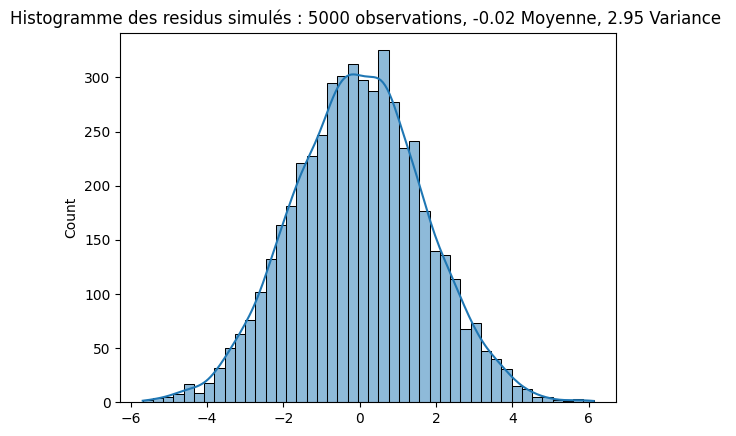

In [48]:
# Fonction pour analyser les residus à partir des visualisations.
function_simulation_tools.visualization_residus(Residus=Residus, Figure='Histogramme')

[]

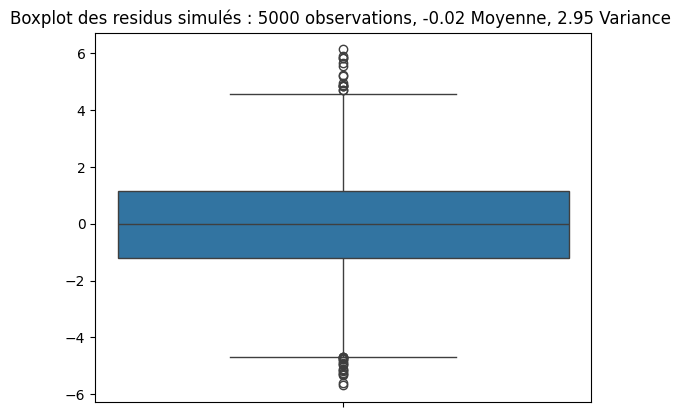

In [49]:
# Fonction pour analyser les residus à partir des visualisations.
function_simulation_tools.visualization_residus(Residus=Residus, Figure='Boxplot')

## IV.3 Simulation des variables d'entrée X et de la variable cible y

In [50]:
# Nombre de Variables d'entrée
FeatureNumber = 8
Coefs_B = [0.69, 1.41, 2.73, -2.84, -3, 3.14, -7, 11]

# Fonction pour simuler les variables d'entrée X et la variable cible y
data_population = function_simulation_tools.simulation_X_y(
    PopulationSize=PopulationSize,
    FeatureNumber=FeatureNumber,
    Coefs_B=Coefs_B,
    Residus=Residus,
    SaveOptionPath=mkdir_data,
    Random_State_Seed=random_state_seed
)
data_population.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,-2.101035,-1.151514,0.056578,0.625905,1.698989,-1.181865,0.689376,0.532623,0.090816
1,-0.549363,-1.354884,0.090326,0.766721,1.588549,1.453207,0.564089,0.597769,0.719459
2,-5.226830,0.390334,0.050878,0.620461,1.113926,0.650452,-0.178577,0.605067,0.227654
3,-0.848379,-0.823722,0.079268,0.688097,0.679008,0.855681,0.481480,0.406786,0.266656
4,-4.213862,-0.074209,0.045706,0.565449,0.643496,-0.837548,-0.203731,0.536650,-0.083748


## IV.4 Constitution de l'échantillon


In [51]:
# Taille de l'échantillon souhaitée
SampleSize = 500

# Fonction pour constituer un échantillon à partir des données de la population
data_sample = function_simulation_tools.sampling(
    dataframe_population=data_population,
    SampleSize=SampleSize,
    SaveOptionPath=mkdir_data,
    Random_State_Seed=random_state_seed
)
data_sample.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
888,11.971990,-0.074583,0.057682,0.831262,0.468929,-0.024793,0.737874,0.250837,0.977602
1240,-4.618505,-0.665206,0.069854,0.821082,2.719892,-1.054131,0.022105,0.646361,0.253455
3079,-1.672278,-0.422928,0.049502,0.645371,1.143765,0.438268,0.215191,0.417476,0.510545
538,-1.187008,-0.182922,0.047633,0.578290,1.406609,-0.414186,-0.362289,0.316792,0.403354
3403,-4.069689,0.184071,0.043890,0.809818,1.176001,-0.374659,-0.435579,0.468224,0.140625


In [52]:
# Sauvegarde des données de l'échantillon
data_sample.to_csv("results_data/data_sample.csv", index=False)

## IV.5 Séparation de la base de données échantillon


In [53]:
# Base d'apprentissage et d'évaluation à l'aide de la validation croissée
data_train, data_test = train_test_split(data_sample, test_size=0.25, random_state=random_state_seed)

In [54]:
# Sauvegarde des données d'entrainement et des données d'évaluation
data_train.to_csv('results_data/data_train.csv', index = False)
data_test.to_csv('results_data/data_test.csv', index = False)

## IV.6 Choix de la base de données pour l'étude


In [55]:
# Bases de données probables
data_names = ['data_population', 'data_sample', 'data_train', 'data_test']

# Base de dnnées de l'étude
data_final = pd.read_csv(f"{mkdir_data}/{data_names[2]}.csv")

# Aperçu de la base de données
data_final.head(5)

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,-0.061931,-2.001550,0.039670,0.650707,1.182122,0.698009,1.107494,0.490525,0.358251
1,1.256667,-0.397370,0.054195,0.728712,1.351651,-0.333826,0.531067,0.076077,0.132607
2,-0.804918,1.376508,0.066590,0.576486,-0.119106,0.037598,-0.130709,0.422409,0.012350
3,-14.769712,0.652189,0.040696,0.847665,2.315159,0.503842,-0.530352,0.364015,-0.311529
4,2.714354,0.035069,0.067509,0.715520,1.735242,0.364829,0.615011,0.380381,0.652116


In [56]:
# Variable à prédire
Target = np.array(data_sample['y']).reshape(-1,1)

# Variables prédictives
Predictors = data_sample.drop('y', axis=1)

# Variables prédictives standardisées : Ridge et Lasso
# scaler = StandardScaler()
# Predictors_scaled_array = scaler.fit_transform(Predictors)
# Predictors_scaled = pd.DataFrame(Predictors_scaled_array, columns=Predictors.columns)

# V. Régression

## 3.1 Estimation

In [57]:
# Estimation du modèle de Régression par MCO avec constante
RegMCO = LinearRegression(fit_intercept=True)
RegMCO.fit(Predictors, Target)

LinearRegression()

## 3.2 Résultats

In [58]:
# Résultats du modèle de régression par MCO
RegMCO.coef_

array([[ 0.54807823,  8.03108889,  2.81695203, -2.83889562, -3.03945184,
         3.01312946, -6.97945957, 10.56750821]])

In [59]:
# Estimation du modèle de Régression par MCO avec constante
RegressionsModels = OLS(Target, sm.add_constant(Predictors))
regMC0_sm = RegressionsModels.fit()

# Résultats du modèle de régression par MCO
regMC0_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     561.4
Date:                Fri, 13 Feb 2026   Prob (F-statistic):          1.64e-241
Time:                        10:39:17   Log-Likelihood:                -981.37
No. Observations:                 500   AIC:                             1981.
Df Residuals:                     491   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3934      0.659     -0.597      0.551      -1.688       0.901
X_1            0.5481      0.089      6.176      0.000       0.374       0.722
X_2            8.0311      3.850      2.086      0.037       0.467      15.595
X_3            2.8170      0.881      3.199      0.001       1.087       4.547
X_4           -2.8389      0.095    -29.774      0.000      -3.026      -2.652
X_5           -3.0395      0.082    -37.266      0.000      -3.200      -2.879
X_6            3.0131      0.166     18.122      0.000       2.686       3.340
X_7           -6.9795      0.470    -14.845      0.000      -7.903      -6.056
X_8           10.5675      0.259     40.870      0.000      10.059      11.076
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.049
Skew:                           0.010   Prob(JB):                        0.976
Kurtosis:                       2.955   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Régression Régularisée RIDGE

## 4.1 Coefficient de Pénalisation

In [60]:
# Définition du coefficient de pénalisaton
CoefPenalisation = 0.15

## 4.2 Estimation

In [61]:
# Estimation du modèle par Régression Régularisée : Ridge
RegRidge = Ridge(alpha=CoefPenalisation, fit_intercept=True, random_state=random_state_seed)
RegRidge.fit(Predictors, Target)

Ridge(alpha=0.15, random_state=1980)

## 4.3 Résultats


```python

# GRIDSEARCHCV SANS PIPELINE
----------------------------


# Importation de la fonction Pipeline
from sklearn.pipeline import Pipeline

# Paramètre de la régression Ridge
RegRidge_params = {
    'alpha' : [0.15, 2, 3]
}

RegRidge_GridSearchCV = GridSearchCV(estimator=RegRidge, param_grid=RegRidge_params, cv=3)
print(RegRidge)

RegRidge_GridSearchCV.fit(Predictors, Target)

pd.DataFrame(RegRidge_GridSearchCV.cv_results_)

RegRidge_GridSearchCV.cv_results_['param_alpha'][0]

# GRIDSEARCHCV AVEC PIPELINE
----------------------------

# Importation de la fonction Pipeline
from sklearn.pipeline import Pipeline

ridge_model = Ridge()

# Construction d'un pipeline
pipe = Pipeline([
    ('model', ridge_model)
])

pipe.fit(Predictors, Target)

RegRidge_params = {
    'model__alpha' : [0.15, 2, 3]
}
ridge_pipeline = GridSearchCV(estimator=pipe, param_grid=RegRidge_params, cv=3)
ridge_pipeline.fit(Predictors, Target)



In [62]:
alpha_list = np.array([0.15, 2, 3])

In [63]:
Summary_ridge_coef = ridge_finetuning(Predictors=Predictors, Target=Target, Alpha_list=alpha_list, Intercept=True, Random_State_Seed=random_state_seed)
Summary_ridge_coef

,Variables,Ridge_Alpha_0.15,Ridge_Alpha_2.0,Ridge_Alpha_3.0
0,Intercept,-0.180559,0.319268,0.401206
1,X_1,0.552830,0.541656,0.532714
2,X_2,4.638831,0.761460,0.527671
3,X_3,2.754090,1.973936,1.712683
4,X_4,-2.837843,-2.827755,-2.822152
5,X_5,-3.042562,-3.035819,-3.029756
6,X_6,3.009568,2.953704,2.923488
7,X_7,-6.901352,-6.055602,-5.676104
8,X_8,10.528851,10.094570,9.875557


<Axes: >

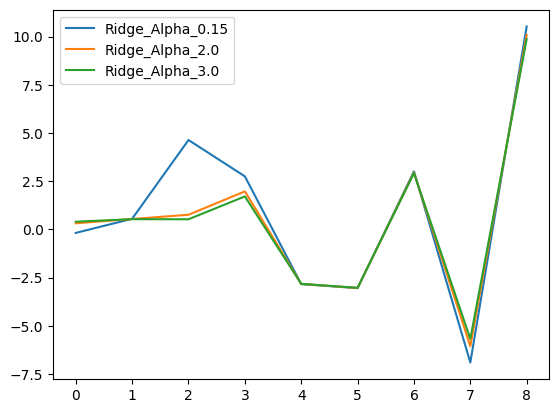

In [64]:
Summary_ridge_coef.plot(kind='line')

## 4.4 Vérification

In [65]:
# Estimation de la régression Ridge
regRidge_sm = RegressionsModels.fit_regularized(
    method='sqrt_lasso',
    alpha=CoefPenalisation,
    L1_wt=0
)

regRidge_sm_regularized = RegressionsModels.fit(start_params=regRidge_sm.params)
regRidge_sm_regularized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     561.4
Date:                Fri, 13 Feb 2026   Prob (F-statistic):          1.64e-241
Time:                        10:39:17   Log-Likelihood:                -981.37
No. Observations:                 500   AIC:                             1981.
Df Residuals:                     491   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3934      0.659     -0.597      0.551      -1.688       0.901
X_1            0.5481      0.089      6.176      0.000       0.374       0.722
X_2            8.0311      3.850      2.086      0.037       0.467      15.595
X_3            2.8170      0.881      3.199      0.001       1.087       4.547
X_4           -2.8389      0.095    -29.774      0.000      -3.026      -2.652
X_5           -3.0395      0.082    -37.266      0.000      -3.200      -2.879
X_6            3.0131      0.166     18.122      0.000       2.686       3.340
X_7           -6.9795      0.470    -14.845      0.000      -7.903      -6.056
X_8           10.5675      0.259     40.870      0.000      10.059      11.076
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.049
Skew:                           0.010   Prob(JB):                        0.976
Kurtosis:                       2.955   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Régression Régularisée LASSO


## 5.1 Estimation

In [66]:
# Estimation du modèle par Régression Régularisée : Lasso
RegLasso = Lasso(alpha=CoefPenalisation, fit_intercept=True, random_state=random_state_seed)
RegLasso.fit(Predictors, Target)

Lasso(alpha=0.15, random_state=1980)

## 5.2 Résultats


In [67]:
RegLasso.coef_

array([ 0.30065598,  0.        ,  0.        , -2.6582216 , -2.8802442 ,
        2.29902298, -1.30825745,  8.68094966])

In [68]:
Summary_lasso_coef = lasso_finetuning(Predictors=Predictors, Target=Target, Alpha_list=alpha_list, Intercept=True, Random_State_Seed=random_state_seed)

In [69]:
Summary_lasso_coef

,Variables,Ridge_Alpha_0.15,Ridge_Alpha_2.0,Ridge_Alpha_3.0
0,Intercept,0.035646,-1.174631,-1.20856
1,X_1,0.300656,0.000000,0.00000
2,X_2,0.000000,0.000000,0.00000
3,X_3,0.000000,0.000000,0.00000
4,X_4,-2.658222,-0.000000,-0.00000
5,X_5,-2.880244,-0.822465,-0.00000
6,X_6,2.299023,0.000000,0.00000
7,X_7,-1.308257,-0.000000,-0.00000
8,X_8,8.680950,0.000000,0.00000


<Axes: >

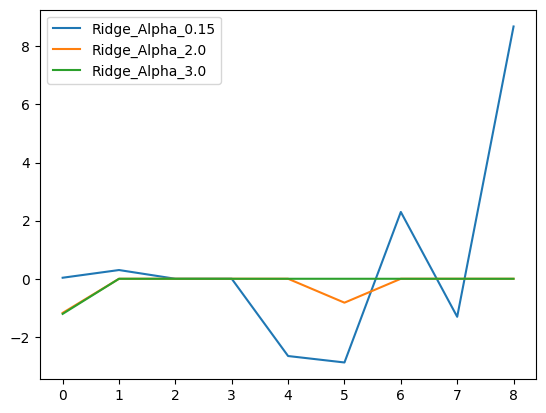

In [70]:
Summary_lasso_coef.plot(kind='line')

# 6. Analyse des Prédictions des Modèles de Régression

In [71]:
# Création du dataframe
data_predictions = pd.DataFrame({"Obs_True":Target.ravel()})

In [72]:
# Prédiction des modèles de régression
RegMCO_y_s_pred = RegMCO.predict(Predictors)
RegRidge_y_s_pred = RegRidge.predict(Predictors)
RegLasso_y_s_pred = RegLasso.predict(Predictors)

In [73]:
# Matrice des prédictions
data_predictions['Obs_Pred_Mco'] = RegMCO_y_s_pred
data_predictions['Obs_Pred_Ridge'] = RegRidge_y_s_pred
data_predictions['Obs_Pred_Lasso'] = RegLasso_y_s_pred

In [74]:
# Aperçu de la base de données
data_predictions.head(5)

,Obs_True,Obs_Pred_Mco,Obs_Pred_Ridge,Obs_Pred_Lasso
0,11.971990,11.918116,11.862437,8.692861
1,-4.618505,-4.167808,-4.199939,-2.952827
2,-1.672278,0.141017,0.155321,-0.013634
3,-1.187008,-0.256648,-0.229385,-0.311336
4,-4.069689,-2.952962,-2.903932,-2.349176


In [75]:
# Sauvegarder de la base de données de prédiction
data_predictions.to_csv(f"{mkdir_data}/data_predictions.csv", index=False)

# Visualisation des prédictions

[]

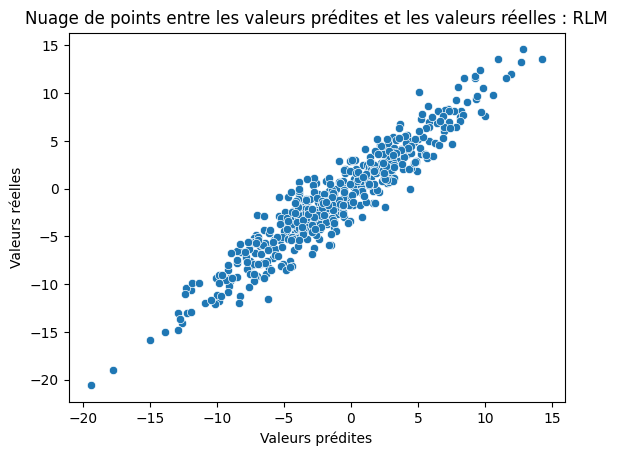

In [76]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Mco', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RLM')
plt.plot()


[]

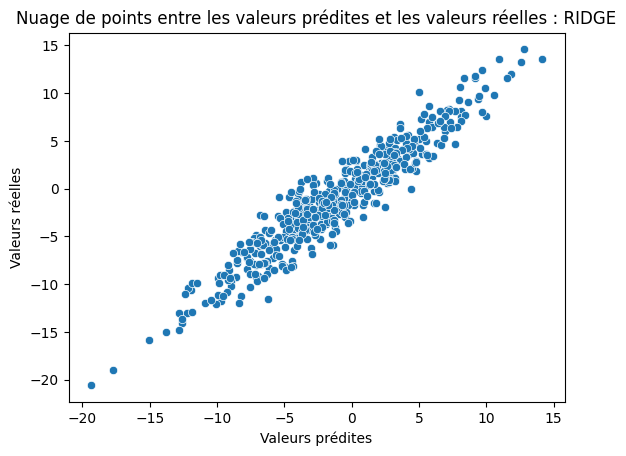

In [77]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Ridge', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : RIDGE')
plt.plot()


[]

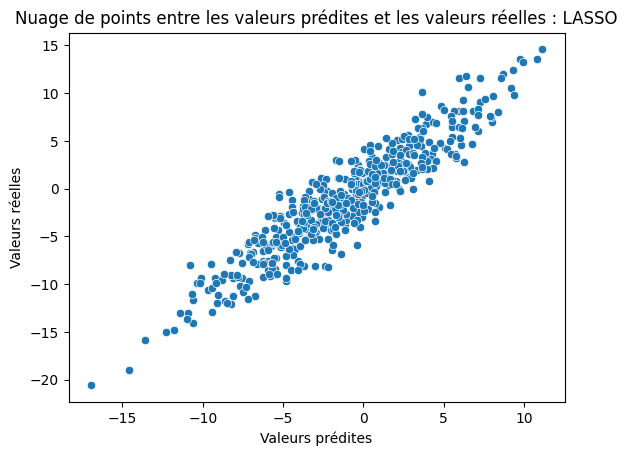

In [78]:
# Nugae de points entre les valeurs réelles et les valeurs prédites du modèle de MCO
sns.scatterplot(data=data_predictions, x='Obs_Pred_Lasso', y='Obs_True')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Nuage de points entre les valeurs prédites et les valeurs réelles : LASSO')
plt.plot()


# Etapes Suivantes :

1. Installation des packages à partir du terminal
2. Création d'une fonction permettant de simuler des residus et d'effectuer des statistiques descriptives
3. Implémebntation de B_ridge lorsque Lambda grandi et visualiisation (GridResearchCV avec CV=1 ou chercher des alternatives)
4. Implémentation de B_lasso lorsque  Lambda grandi et visualisation (GridResearchCV avec CV=1 ou chercher des alternatives)
5. Courbes de niveau des estimateurs
6.